In [1]:
import fitdecode
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
def get_long_lat(filename):
    # read longitude/latitude data from .fit files
    
    longitudes = []
    latitudes = []

    with fitdecode.FitReader(filename) as fit_file:
        for frame in fit_file:
            if isinstance(frame, fitdecode.records.FitDataMessage):
                if frame.name == 'lap':
                    continue

                elif frame.name == 'record':
                    if frame.has_field('position_lat') and frame.has_field('position_long'):
                        lat = frame.get_value('position_lat')/((2**32)/360)
                        long = frame.get_value('position_long')/((2**32)/360)
                        
                        # distortion correction
                        # https://surferhelp.goldensoftware.com/editmap/using_scaling_to_minimize_distortion_on_latitude_longitude_maps.htm#:~:text=Let's%20say%20you%20are%20plotting,the%20latitude%20(N%2DS)%20direction.
                        long *= np.cos(np.deg2rad(lat))
                        
                        latitudes.append(lat)
                        longitudes.append(long)
                        
                        #latitudes.append(frame.get_value('position_lat')/((2**32)/360))
                        #longitudes.append(frame.get_value('position_long')/((2**32)/360))
    return longitudes, latitudes

[]

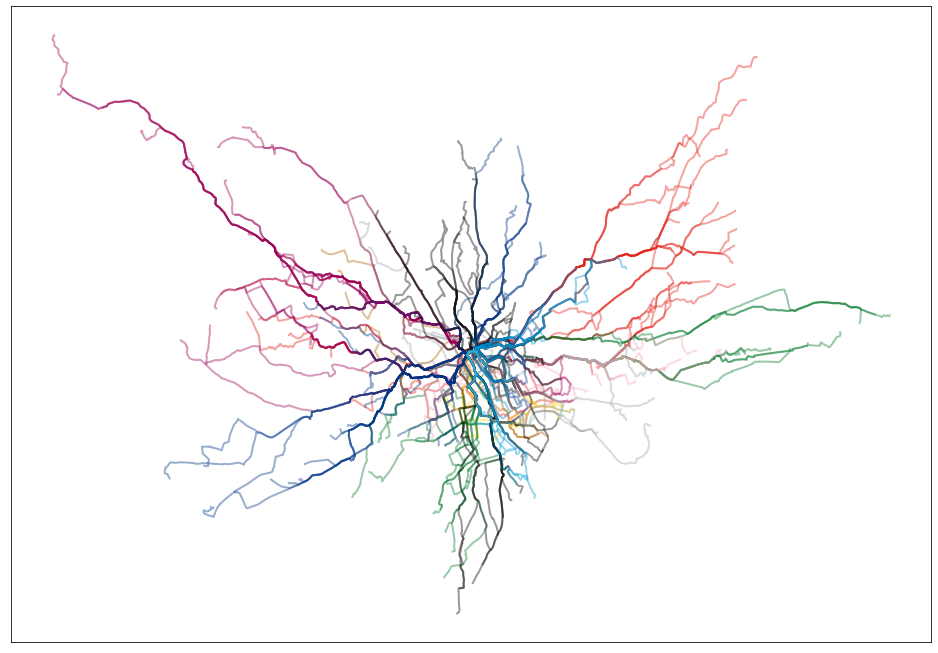

In [3]:
# runs are organised into folders named for the tube line i want to plot them as

# set up dictionary of hex codes for tube line colours
color_dict = {'bakerloo':'#B36305', 'central':'#E32017', 'circle':'#FFD300', 'district':'#00782A', 'hammersmith_and_city':'#F3A9BB', 'jubilee':'#A0A5A9', 'metropolitan':'#9B0056', 'northern':'#000000', 'piccadilly':'#003688', 'victoria':'#0098D4', 'waterloo_and_city':'#95CDBA'}

alpha = 0.4
lw = 2

fig, ax = plt.subplots(1,1,figsize=(16.5,11.7)) #a3
# keep track of all lats and longs if want to get min/max for scaling etc. later
all_longs = []
all_lats = []

for directory in color_dict.keys():

    # iterate over files in
    # each directory
    for filename in os.listdir(directory):
        
        if filename.endswith('.fit'):
            
            name = directory+"/"+filename
            long, lat = get_long_lat(name)
            
            ax.plot(long, lat, color=color_dict[directory], lw=lw, alpha=alpha)
            all_longs.append(long)
            all_lats.append(lat)
            
ax.set_xticks([])
ax.set_yticks([])
#plt.savefig('runderground.png', dpi=600)